<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/RecurrentANN/LSTM_aviation_Recorrent_Neural_Network_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from sklearn import preprocessing

In [3]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [4]:
df=pd.read_csv("airline-passengers.csv")

In [5]:
series = np.array(df['Passengers'])

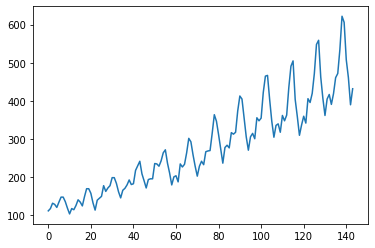

In [6]:
plt.plot(series)

In [7]:
series = series.reshape(-1, 1)
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(series)
series =  scaler_X.transform(series)

In [8]:
P = 10 # period
D = 1
X = []
Y = []
num,col = df.shape

for t in range(num-P):
  t_next = t+ P
  xx = series[t:t_next]
  X.append(xx)
  yy = series[t_next]
  Y.append(yy)

X = np.array(X).reshape(-1,P,1) # data NxDxP
Y = np.array(Y)
print('input shape',X.shape,'output shape',Y.shape )

input shape (134, 10, 1) output shape (134, 1)


In [9]:
N, cols, other = X.shape
N1 = int(0.8*N)
X_train = X[:N1]
Y_train = Y[:N1]
X_test = X[N1:]
Y_test = Y[N1:]

In [10]:
X_test.shape

(27, 10, 1)

In [11]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Input(shape=(P,1)))

# Add a simpleRNN layer with 5 internal units.
model.add(LSTM(10,'tanh'))
# Add a Dense layer with 1 units.
model.add(Dense(1))
# 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mse',optimizer=Adam(lr=0.1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
r = model.fit(X_train,Y_train,
              epochs=100, 
              validation_data = ( X_test ,Y_test ) )

Epoch 1/100
4/4 [==============================] - 19s 316ms/step - loss: 0.2103 - val_loss: 0.1023
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0448 - val_loss: 0.1127
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0425 - val_loss: 0.0646
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0296 - val_loss: 0.0632
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0274 - val_loss: 0.0597
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0195 - val_loss: 0.0706
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0170 - val_loss: 0.0848
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0169 - val_loss: 0.0620
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0165 - val_loss: 0.0609
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0167 - val_loss: 0.0985
Epoch 11/100
4/4 

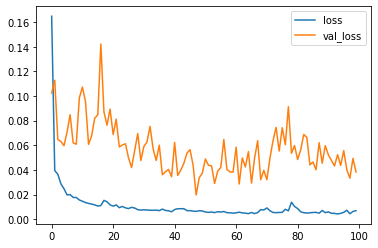

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [15]:
pred_Y = model.predict(X_test)

pred_Y  = scaler_X.inverse_transform(np.array(pred_Y ).reshape(-1,1))
Y_test = scaler_X.inverse_transform(np.array(Y_test).reshape(-1,1))

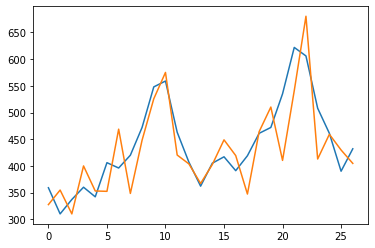

In [16]:
# this is a wrong way to do....

plt.plot(Y_test, label='prediction target')
plt.plot(pred_Y, label='prediction forecast')

In [21]:
pred_test = []
for xi in X_test:
  yi = model.predict(xi.reshape(1,-1,1))[0,0]
  pred_test.append(yi)

pred_test  = scaler_X.inverse_transform(np.array(pred_test).reshape(-1,1))

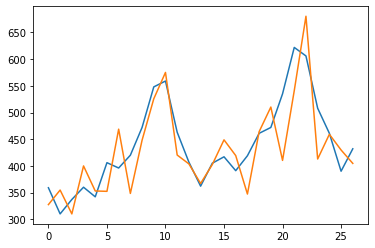

In [22]:
plt.plot(Y_test, label='prediction target')
plt.plot(pred_test, label='prediction forecast')

In [19]:
X_train.shape

(107, 10, 1)

In [20]:
X_test.shape

(27, 10, 1)